# 2.1.	Importação bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2.2.	Carregando os dados e verificando seu conteúdo

In [2]:
df=pd.read_csv("D:/Python/Projeto 2 Udacity/titanic-data-6.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [76]:
df.shape

(891, 12)

In [58]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df["Age"].min()



0.42

In [8]:
df["Age"].max()

80.0

In [11]:
df.groupby(by="Sex")["Age"].min()

Sex
female    0.75
male      0.42
Name: Age, dtype: float64

In [12]:
df.groupby(by="Sex")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


# 2.4.	Qualidade de dados


In [77]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
df.duplicated().sum()

0

# 2.5.	Limpeza dos dados

In [3]:
df["Age"]=df["Age"].fillna(df["Age"].mean())
df.drop("Cabin",axis=1,inplace=True)
df.Embarked.fillna(df["Embarked"].mode()[0],inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 2.6.	Criando colunas

In [4]:
df["QtdeFamilia"]=df.SibSp+df.Parch+1
df.Age=df.Age.astype(int)
df["FaixaEtaria"] = pd.cut(df.Age,range(0,90,15))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,QtdeFamilia,FaixaEtaria
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,2,"(15, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,2,"(30, 45]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,1,"(15, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,2,"(30, 45]"
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,1,"(30, 45]"


# 2.5.	Verificando correlações 

In [87]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,QtdeFamilia
PassengerId,1.000000,-0.005007,-0.035144,0.033741,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.067809,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.335071,0.083081,0.018443,-0.549500,0.065997
Age,0.033741,-0.067809,-0.335071,1.000000,-0.232743,-0.176744,0.093856,-0.247370
SibSp,-0.057527,-0.035322,0.083081,-0.232743,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.176744,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.093856,0.159651,0.216225,1.000000,0.217138
QtdeFamilia,-0.040143,0.016639,0.065997,-0.247370,0.890712,0.783111,0.217138,1.000000


In [88]:
corr=round(df.corr(),3)
corr.style.background_gradient()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,QtdeFamilia
PassengerId,1,-0.005,-0.035,0.034,-0.058,-0.002,0.013,-0.04
Survived,-0.005,1,-0.338,-0.068,-0.035,0.082,0.257,0.017
Pclass,-0.035,-0.338,1,-0.335,0.083,0.018,-0.549,0.066
Age,0.034,-0.068,-0.335,1,-0.233,-0.177,0.094,-0.247
SibSp,-0.058,-0.035,0.083,-0.233,1,0.415,0.16,0.891
Parch,-0.002,0.082,0.018,-0.177,0.415,1,0.216,0.783
Fare,0.013,0.257,-0.549,0.094,0.16,0.216,1,0.217
QtdeFamilia,-0.04,0.017,0.066,-0.247,0.891,0.783,0.217,1


# 2.8.	Exploração 

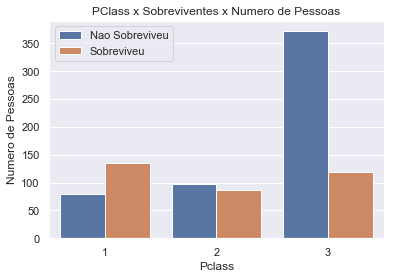

In [96]:
ax=sns.countplot(x="Pclass", hue="Survived",data=df)
ax.set_ylabel("Numero de Pessoas")
ax.set_title("PClass x Sobreviventes x Numero de Pessoas")
plt.legend(["Nao Sobreviveu","Sobreviveu"])
plt.show()



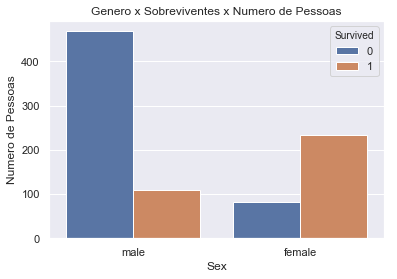

In [112]:
ax=sns.countplot(x="Sex", hue="Survived",data=df)
ax.set_ylabel("Numero de Pessoas")
ax.set_title("Genero x Sobreviventes x Numero de Pessoas")
plt.legend(["Nao Sobreviveu","Sobreviveu"])



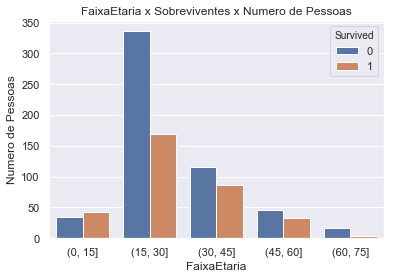

In [113]:
ax=sns.countplot(x="FaixaEtaria", hue="Survived",data=df)
ax.set_ylabel("Numero de Pessoas")
ax.set_title("FaixaEtaria x Sobreviventes x Numero de Pessoas")
plt.legend(["Nao Sobreviveu","Sobreviveu"])


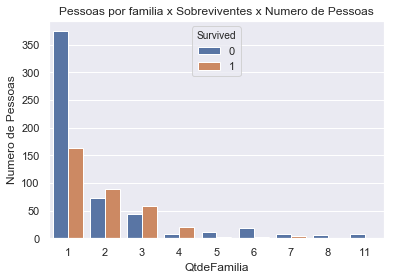

In [115]:
ax=sns.countplot(x="QtdeFamilia", hue="Survived",data=df)
ax.set_ylabel("Numero de Pessoas")
ax.set_title("Pessoas por familia x Sobreviventes x Numero de Pessoas")
plt.legend(["Nao Sobreviveu","Sobreviveu"])


[Text(0,0.5,'Numero de pessoas')]

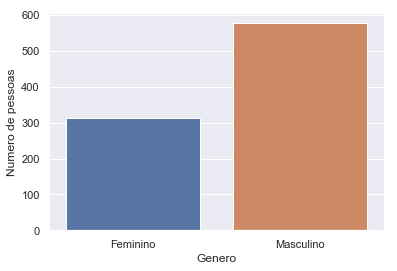

In [119]:
data=np.unique(df.Sex,return_counts=True)
labs=["Feminino", "Masculino"]

plt=sns.barplot(x=labs,y=data[1])
plt.set(xlabel="Genero")
plt.set(ylabel="Numero de pessoas")

In [14]:
dataC=np.unique(df.Pclass,return_counts=True)
dataC


(array([1, 2, 3], dtype=int64), array([216, 184, 491], dtype=int64))

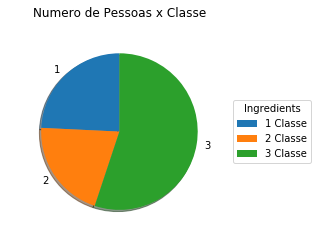

In [29]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))

labels=["1 Classe","2 Classe", "3 Classe"]

ax.legend(wedges, labels,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Numero de Pessoas x Classe")

plt.pie(x=dataC[1],
       labels=dataC[0],
       shadow=True,
       startangle=90,
       radius=0.9)
plt.show()

In [39]:
def box(x,y,hue,data_frame):
    """
    Função que que retorna um grafico baseado nos dados informados.
      Parametros:
          data: Data frame base para construcao do grafico.
          x: eixo X do grafico, considerado o valor independente.
          y: eixo y do grafico, considerado o valor dependente
      Retorna:
          Grafico com a possibilidade de acrescentar etiquetas e
          titulos
    """
    ax=sns.boxplot(x=x, y=y, hue=hue, data=data_frame)
    return ax
    
    

Text(0.5,1,'Idade x Faixa Etaria')

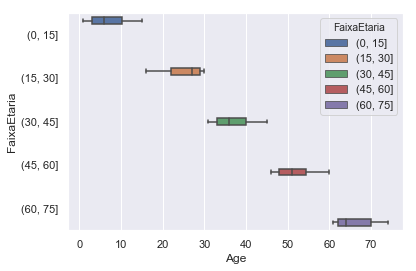

In [40]:
sns.set()
dependent = "FaixaEtaria"
independent = "Age"
box(independent,"FaixaEtaria",dependent,df)
ax.set_ylabel("Faixa Etaria")
ax.set_xlabel("Idade")
ax.set_title("Idade x Faixa Etaria")